### Data Source
The dataset used in this project is the "Wine Quality" dataset from the UCI Machine Learning Repository.  
Source: https://archive.ics.uci.edu/ml/datasets/wine+quality  
Citation:  
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Project Goal

**Predict wine quality** chemical properties from the White Wine Quality dataset.  
- **Baseline model**: Linear Regression  
- **Advanced model**: Feedforward Neural Network 
- **Task type**: Regression (predict quality score)

In [10]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')
print(df.shape)

(4898, 12)


In [11]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')
print(df.head())
print(df.shape)
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [12]:
print(df.shape)

(4898, 12)


In [15]:
df.isnull().sum()
df.duplicated().sum()

np.int64(937)

In [17]:
df = df.drop_duplicates()
print(df.shape)

(3961, 12)


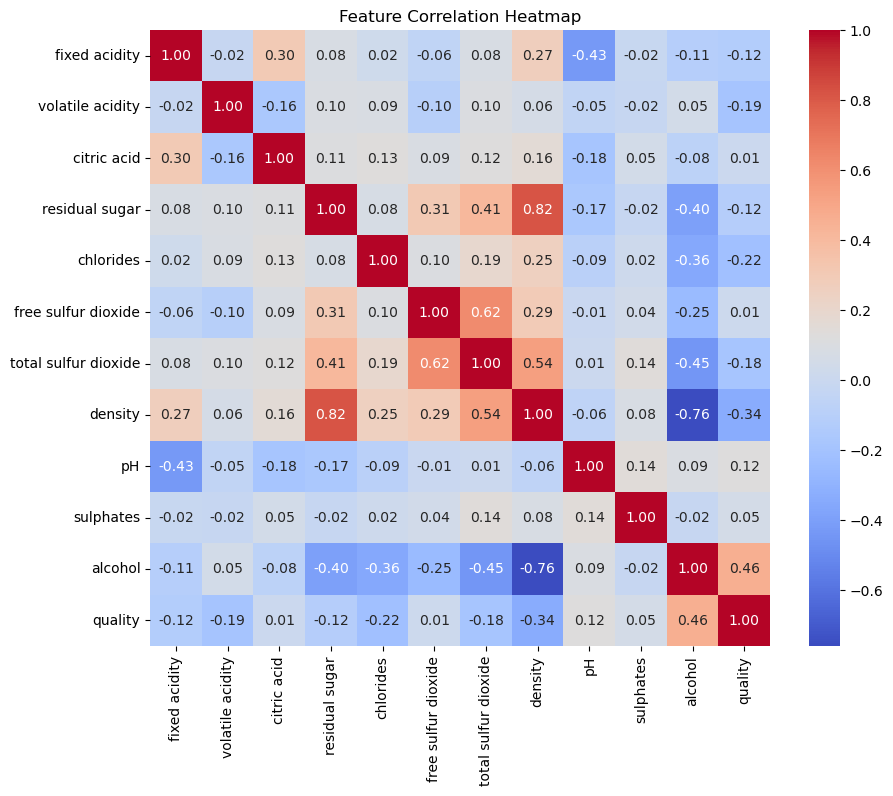

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Text(0.5, 1.0, 'Wine Quality Distribution')

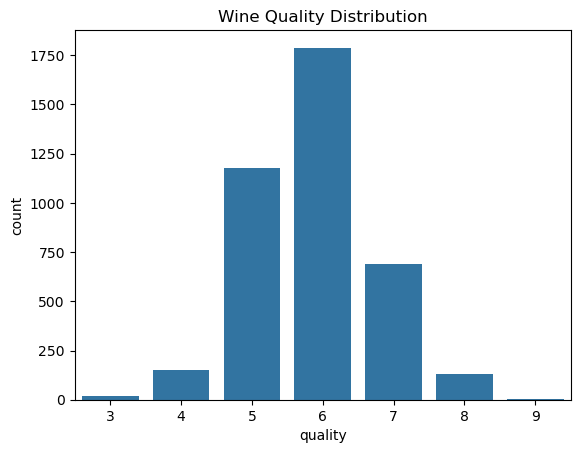

In [20]:
sns.countplot(data=df, x='quality')
plt.title("Wine Quality Distribution")

Text(0.5, 1.0, 'Wine Alcohol Distribution')

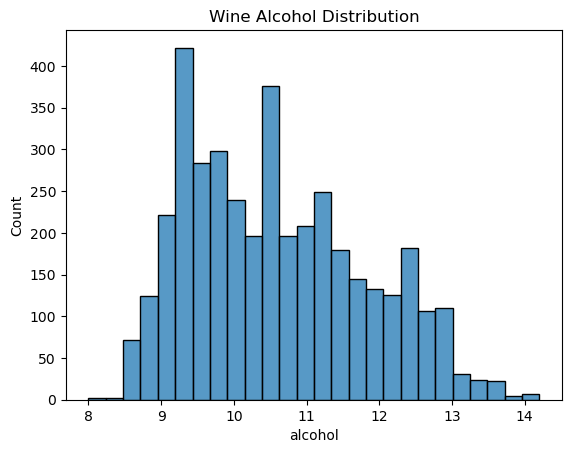

In [43]:
sns.histplot(data=df, x='alcohol')
plt.title("Wine Alcohol Distribution")

Text(0.5, 1.0, 'Wine Residual Sugar Distribution')

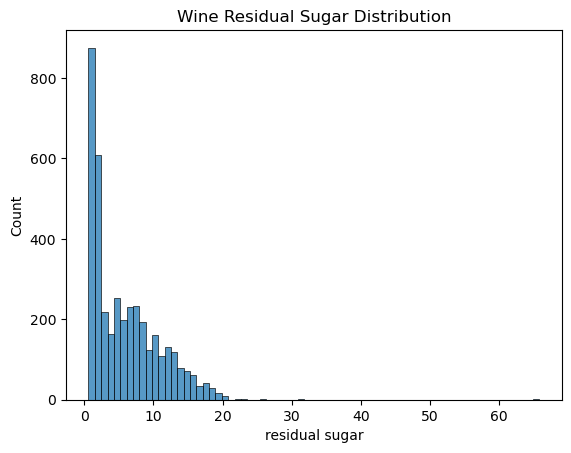

In [26]:
sns.histplot(data=df, x='residual sugar')
plt.title("Wine Residual Sugar Distribution")

Text(0.5, 1.0, 'Wine Chlorides Distribution')

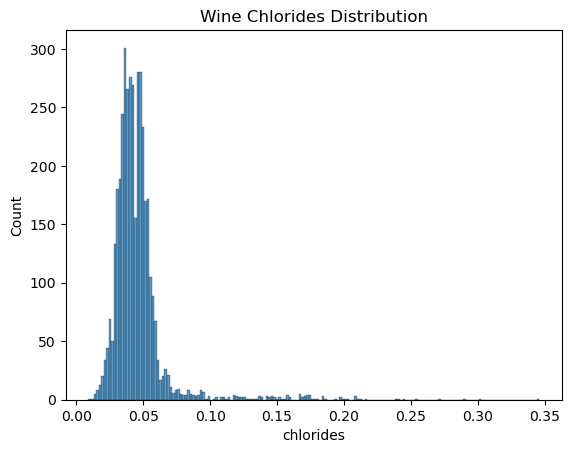

In [39]:
sns.histplot(data=df, x='chlorides')
plt.title("Wine Chlorides Distribution")

Text(0.5, 1.0, 'Wine Fixed Acidity Distribution')

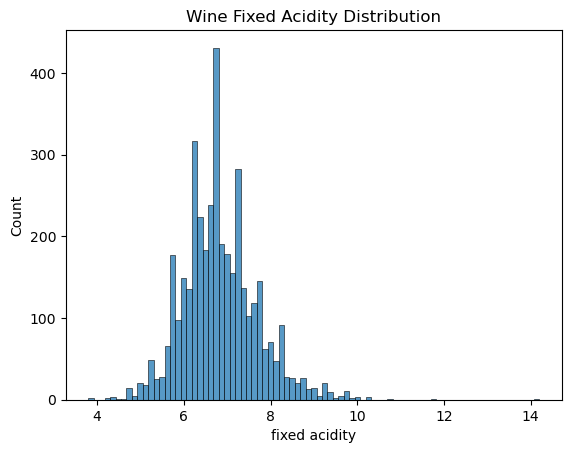

In [32]:
sns.histplot(data=df, x='fixed acidity')
plt.title("Wine Fixed Acidity Distribution")

Text(0.5, 1.0, 'Wine pH Distribution')

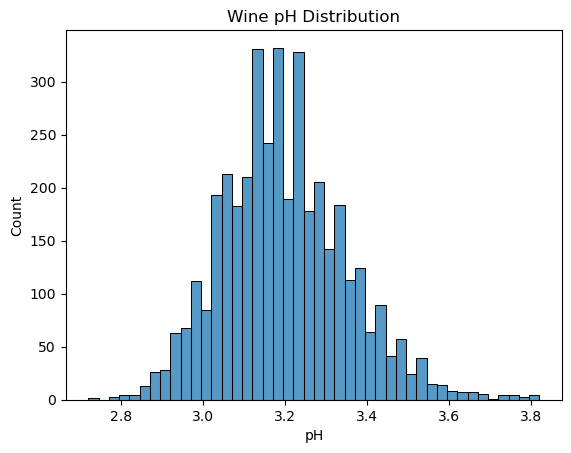

In [33]:
sns.histplot(data=df, x='pH')
plt.title("Wine pH Distribution")

Text(0.5, 1.0, 'Wine Sulphate Distribution')

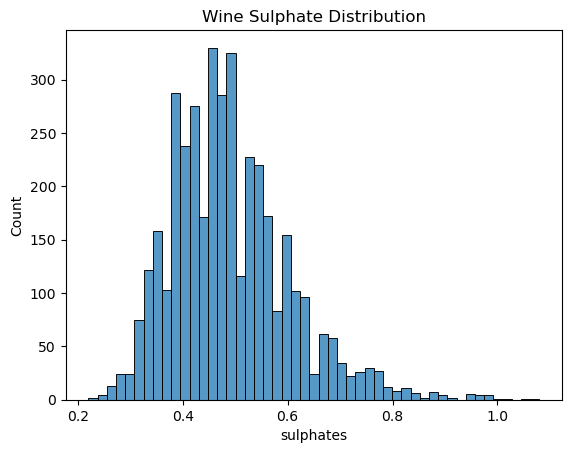

In [34]:
sns.histplot(data=df, x='sulphates')
plt.title("Wine Sulphate Distribution")

Text(0.5, 1.0, 'Wine Citric Acid Distribution')

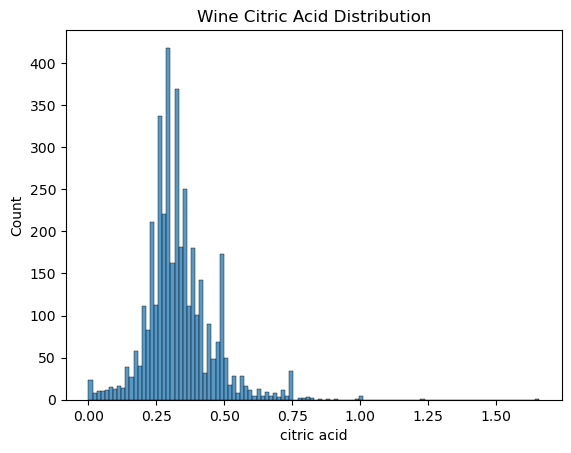

In [37]:
sns.histplot(data=df, x='citric acid')
plt.title("Wine Citric Acid Distribution")

Text(0.5, 1.0, 'Wine Volatile Acidity Distribution')

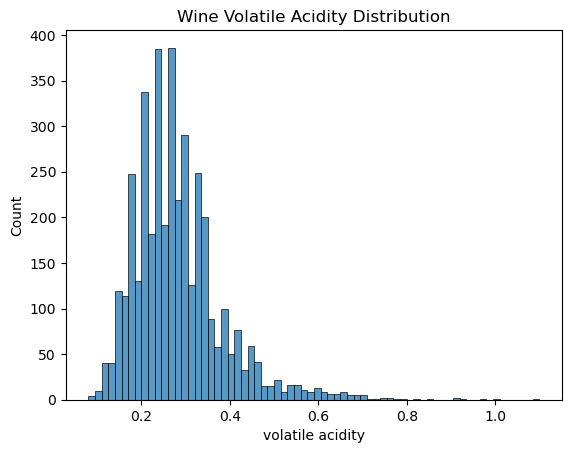

In [40]:
sns.histplot(data=df, x='volatile acidity')
plt.title("Wine Volatile Acidity Distribution")

Text(0.5, 1.0, 'Wine Total Sulfur Dioxide Distribution')

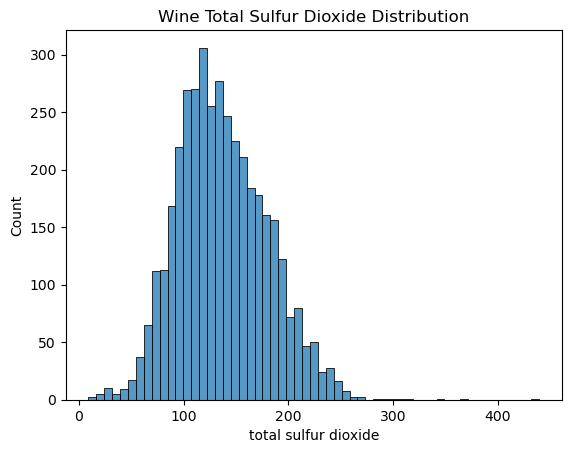

In [41]:
sns.histplot(data=df, x='total sulfur dioxide')
plt.title("Wine Total Sulfur Dioxide Distribution")

Text(0.5, 1.0, 'Wine Free Sulfur Dioxide Distribution')

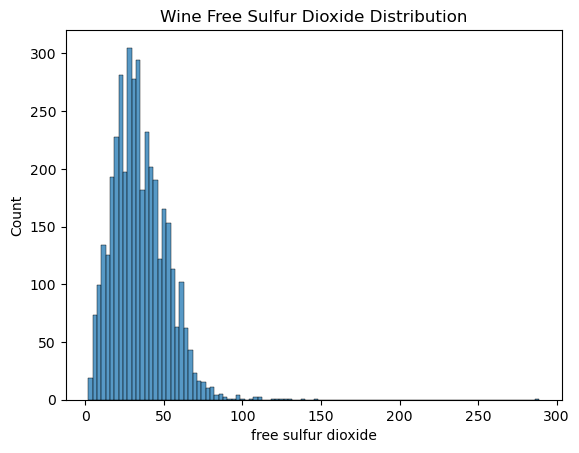

In [42]:
sns.histplot(data=df, x='free sulfur dioxide')
plt.title("Wine Free Sulfur Dioxide Distribution")

Text(0.5, 1.0, 'Wine Density Distribution')

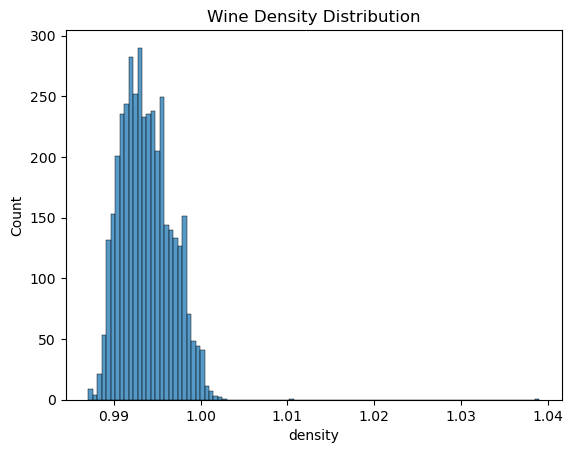

In [44]:
sns.histplot(data=df, x='density')
plt.title("Wine Density Distribution")

In [27]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64

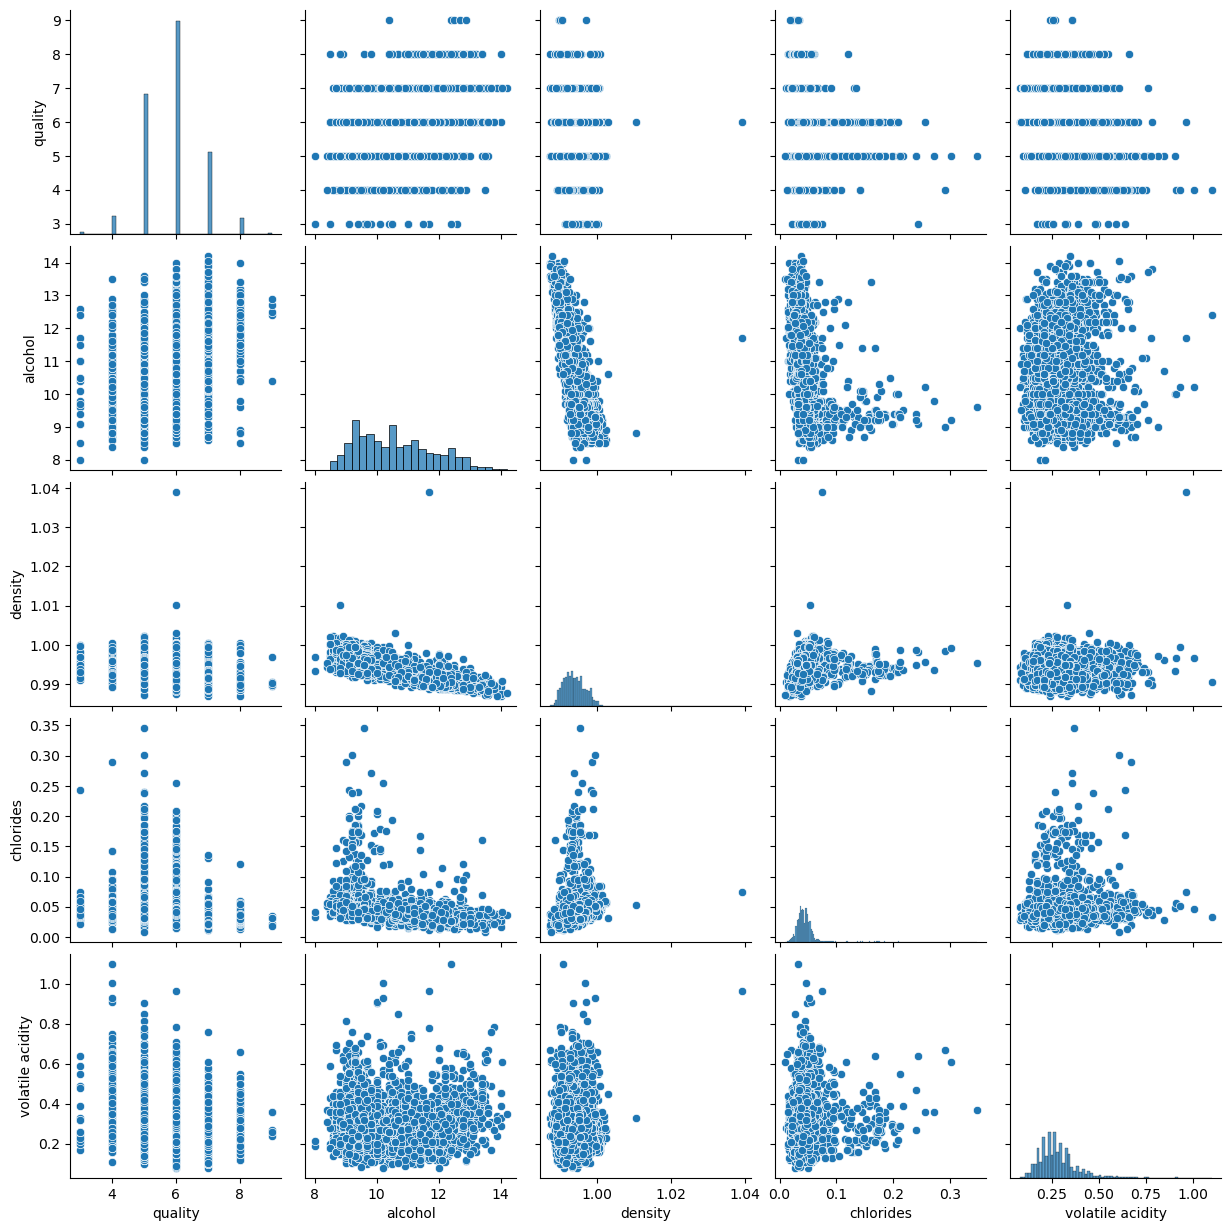

In [29]:
important_features = df.corr()['quality'].abs().sort_values(ascending=False).head(5).index
sns.pairplot(df[important_features])

alcohol, density, chlorides, and volatile acidity are the most important values for determining quality.

<Axes: xlabel='quality', ylabel='alcohol'>

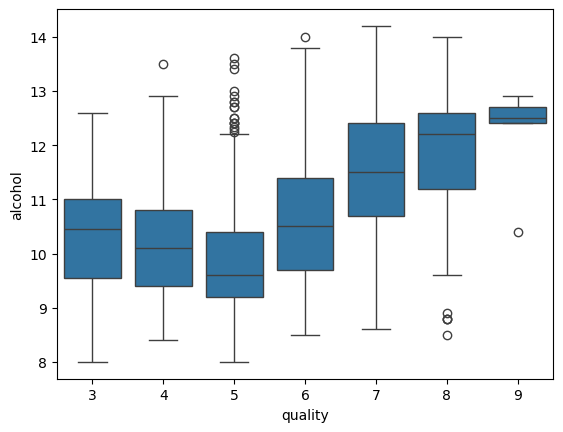

In [45]:
sns.boxplot(x='quality', y='alcohol', data=df)

<Axes: xlabel='quality', ylabel='density'>

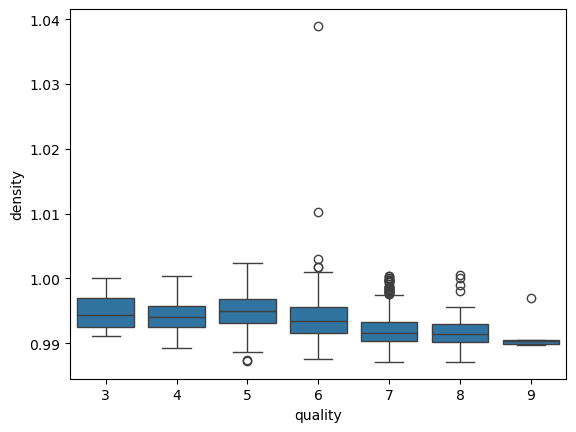

In [46]:
sns.boxplot(x='quality', y='density', data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

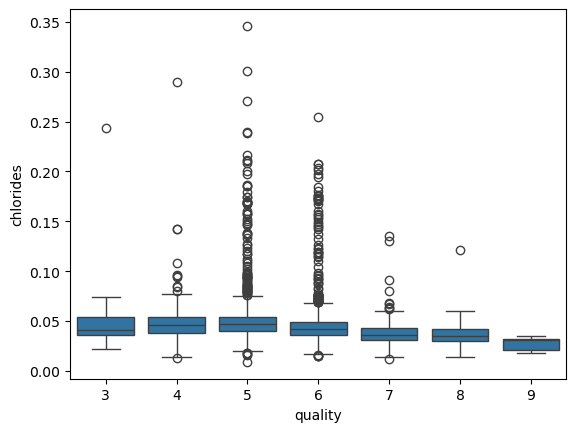

In [47]:
sns.boxplot(x='quality', y='chlorides', data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

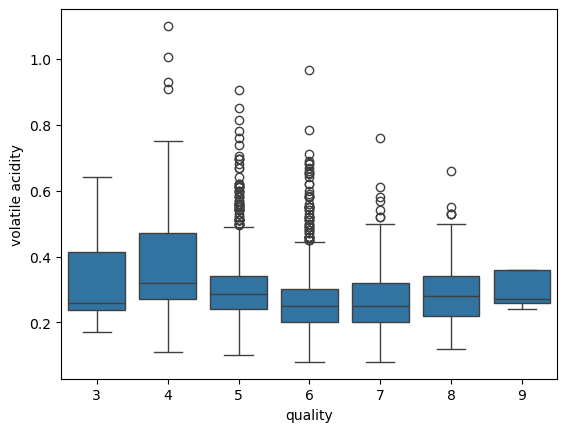

In [48]:
sns.boxplot(x='quality', y='volatile acidity', data=df)

In [63]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("quality", axis=1).values
y = df["quality"].values

# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you want to keep df_test as a DataFrame (optional)
import pandas as pd
df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test["quality"] = y_test

# Also create df_train if needed
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train["quality"] = y_train

# Then calculate mean and std from training features
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

In [64]:
import numpy as np

# Prepare data
X = df.drop("quality", axis=1).values  # shape: (m, n_features)
y = df["quality"].values                # shape: (m, )

# Normalize features 
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

m, n = X_norm.shape  # number of samples and features

# Initialize parameters
w = np.zeros(n)  # weights vector (n features)
b = 0.0          # bias (scalar)
alpha = 0.01     # learning rate
iterations = 1000

for i in range(iterations):
    y_pred = np.dot(X_norm, w) + b   # vectorized prediction
    error = y_pred - y               # vectorized error
    
    cost = (1/(2*m)) * np.sum(error ** 2)  # mean squared error cost
    
    # Gradients (vectorized)
    dw = (1/m) * np.dot(X_norm.T, error)
    db = (1/m) * np.sum(error)
    
    # Update parameters
    w = w - alpha * dw
    b = b - alpha * db
    
    if i % 100 == 0:
        print(f"Iteration {i}: Cost={cost:.4f}")

print(f"Training complete.\nWeights:\n{w}\nBias:\n{b}")

# Predictions on the training set
y_pred_final = np.dot(X_norm, w) + b

Iteration 0: Cost=17.5361
Iteration 100: Cost=2.5933
Iteration 200: Cost=0.5928
Iteration 300: Cost=0.3228
Iteration 400: Cost=0.2858
Iteration 500: Cost=0.2804
Iteration 600: Cost=0.2795
Iteration 700: Cost=0.2792
Iteration 800: Cost=0.2791
Iteration 900: Cost=0.2791
Training complete.
Weights:
[-0.0112106  -0.17017671  0.02690786  0.18890867 -0.02211509  0.09659467
 -0.03863471 -0.16546379  0.07851249  0.05856985  0.36508301]
Bias:
5.854581877203055


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_test = df_test.drop("quality", axis=1).values
Y_test = df_test["quality"].values

X_test_norm = (X_test - X_mean) / X_std 
Y_pred = np.dot(X_test_norm, w) + b

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.5984864461053137
Mean Squared Error (MSE): 0.6079852728083371
R² Score: 0.25866929820634976


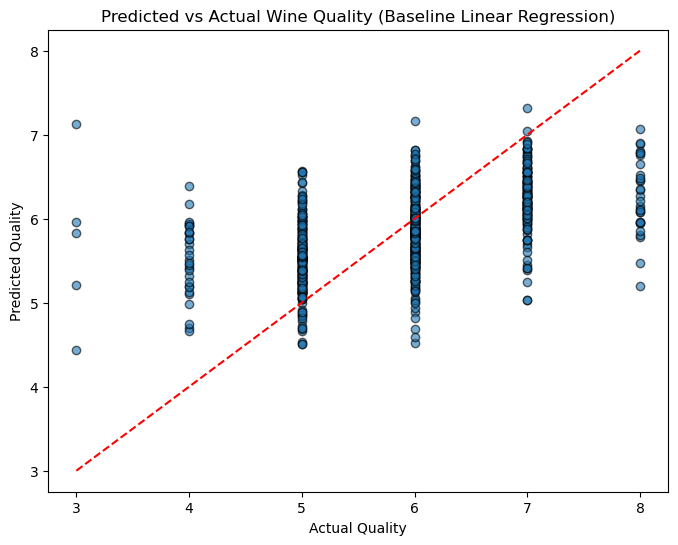

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, alpha=0.6, edgecolor='k')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Wine Quality (Baseline Linear Regression)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')  # diagonal line y=x
plt.show()

Epoch 1/200


C:\Users\mani_\Downloads\AnacondaML\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15.6069 - mae: 3.3764 - val_loss: 2.2039 - val_mae: 1.1272
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0813 - mae: 1.1204 - val_loss: 1.5145 - val_mae: 0.9379
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4125 - mae: 0.9144 - val_loss: 1.0724 - val_mae: 0.8046
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8816 - mae: 0.7389 - val_loss: 0.7779 - val_mae: 0.6765
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6740 - mae: 0.6404 - val_loss: 0.6370 - val_mae: 0.6114
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5796 - mae: 0.6004 - val_loss: 0.5964 - val_mae: 0.5905
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5249 - mae: 0.5729 - val_loss: 0.5706 - val_mae: 0.5759
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4819 - mae: 0.5439 - val_loss: 0.5825 - val_mae: 0.5884
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5168 - mae: 0.

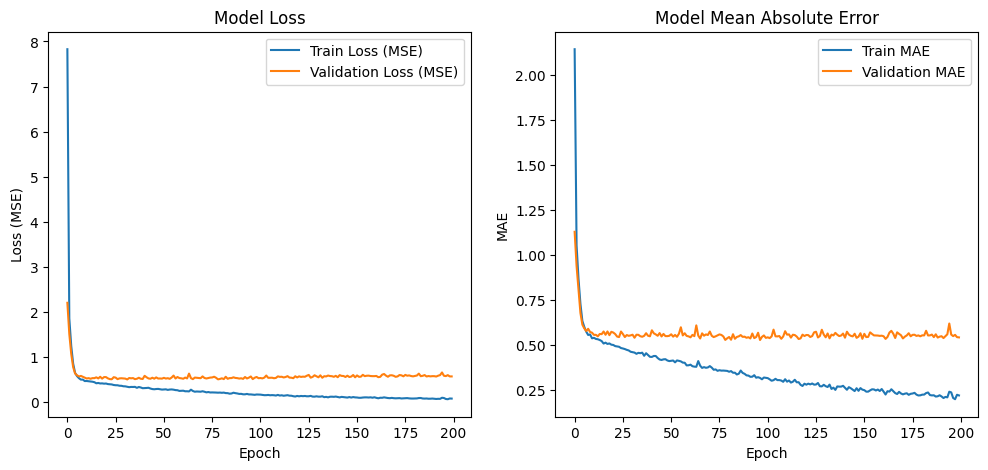

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# Split into features and target
X = df.drop("quality", axis=1).values
y = df["quality"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test MAE:", mae)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

Epoch 1/200


C:\Users\mani_\Downloads\AnacondaML\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.2749 - mae: 2.3479 - val_loss: 2.4960 - val_mae: 1.2525
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9979 - mae: 1.0895 - val_loss: 1.6369 - val_mae: 0.9881
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4293 - mae: 0.9165 - val_loss: 1.2740 - val_mae: 0.8892
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0141 - mae: 0.7812 - val_loss: 0.8668 - val_mae: 0.7246
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7159 - mae: 0.6576 - val_loss: 0.6842 - val_mae: 0.6315
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5864 - mae: 0.6002 - val_loss: 0.6193 - val_mae: 0.6108
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5245 - mae: 0.5660 - val_loss: 0.5743 - val_mae: 0.5781
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5091 - mae: 0.5611 - val_loss: 0.5678 - val_mae: 0.5805
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4906 - mae: 0.5

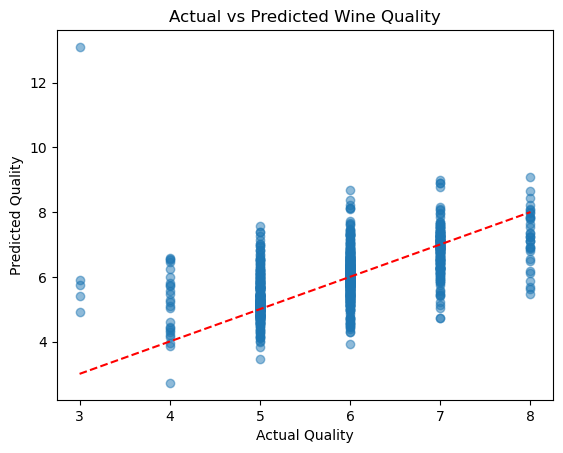

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

X = df.drop("quality", axis=1).values
y = df["quality"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)


y_pred = model.predict(X_test_scaled).flatten()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.show()

model.save('my_model.keras')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

# Split features and target
X = df.drop("quality", axis=1).values
y = df["quality"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on the test set
lr_pred = lr.predict(X_test_scaled)

# Evaluate performance
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print("Linear Regression MAE:", lr_mae)
print("Linear Regression MSE:", lr_mse)

Linear Regression MAE: 0.5862665383250468
Linear Regression MSE: 0.5690247717229254


Epoch 1/200


C:\Users\mani_\Downloads\AnacondaML\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.0563 - mae: 2.1487 - val_loss: 2.0981 - val_mae: 1.1308
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8148 - mae: 1.0378 - val_loss: 1.5367 - val_mae: 0.9709
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2099 - mae: 0.8495 - val_loss: 1.0232 - val_mae: 0.7936
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8186 - mae: 0.7036 - val_loss: 0.6922 - val_mae: 0.6432
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6309 - mae: 0.6198 - val_loss: 0.5814 - val_mae: 0.5849
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5367 - mae: 0.5746 - val_loss: 0.5610 - val_mae: 0.5729
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5079 - mae: 0.5584 - val_loss: 0.5600 - val_mae: 0.5654
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4860 - mae: 0.5458 - val_loss: 0.5570 - val_mae: 0.5756
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4778 - mae: 0.5

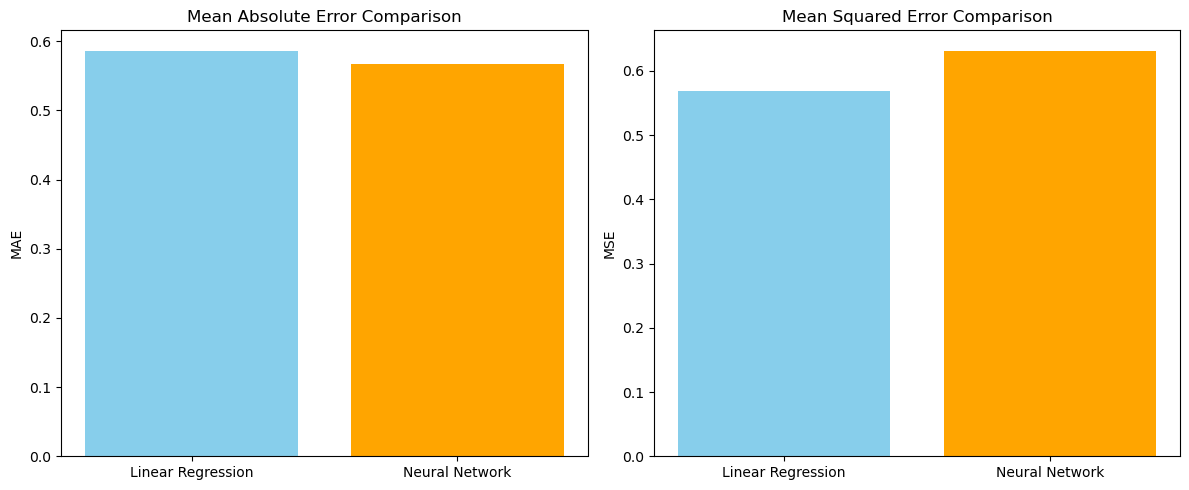

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Predict using your neural network
nn_pred = model.predict(X_test_scaled).flatten()  # flatten in case it's shaped like (m, 1)

# Evaluate performance
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_mse = mean_squared_error(y_test, nn_pred)

nn_pred = model.predict(X_test_scaled).flatten()

print("Neural Network MAE:", nn_mae)
print("Neural Network MSE:", nn_mse)

models = ['Linear Regression', 'Neural Network']
mae_scores = [lr_mae, nn_mae]
mse_scores = [lr_mse, nn_mse]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color=['skyblue', 'orange'])
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.bar(models, mse_scores, color=['skyblue', 'orange'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

nn_mae = mean_absolute_error(y_test, nn_pred)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

print(f"Neural Network MAE: {nn_mae:.4f}")
print(f"Neural Network MSE: {nn_mse:.4f}")
print(f"Neural Network R²:  {nn_r2:.4f}")

Neural Network MAE: 0.5663
Neural Network MSE: 0.6314
Neural Network R²:  0.1847


In [18]:
for actual, pred in zip(y_test[:10], nn_pred[:10]):
    print(f"Actual: {actual}, Predicted: {pred:.2f}")


Actual: 7, Predicted: 7.09
Actual: 8, Predicted: 8.02
Actual: 8, Predicted: 7.06
Actual: 5, Predicted: 4.48
Actual: 7, Predicted: 6.71
Actual: 6, Predicted: 6.13
Actual: 5, Predicted: 4.59
Actual: 4, Predicted: 5.34
Actual: 6, Predicted: 6.14
Actual: 5, Predicted: 5.25


In [19]:
# Linear Regression (already done before)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print("Linear Regression MAE:", lr_mae)
print("Linear Regression MSE:", lr_mse)

# Neural Network                                                                                     
nn_pred = model.predict(X_test_scaled).flatten()
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_mse = mean_squared_error(y_test, nn_pred)

print("Neural Network MAE:", nn_mae)
print("Neural Network MSE:", nn_mse)

Linear Regression MAE: 0.5862665383250468
Linear Regression MSE: 0.5690247717229254
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network MAE: 0.562214732170105
Neural Network MSE: 0.614387571811676


In [11]:
import os
print(os.getcwd())

C:\Users\mani_\Downloads\VidurPython
